## HDFC Bank Stock prediction for March-April 2021 using RNN(LSTM)

#### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

Dataset- https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=HDFCBANK.csv

In [2]:
# Importing the training set
dataset_train = pd.read_csv('HDFCBANK_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


#### Building the RNN(Recurrent Neural Network)

In [7]:
# Imporing Keras
import keras

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
# Initialising the RNN
regressor = Sequential()

In [10]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 38, batch_size = 32)

Epoch 1/38
163/163 [==============================] - 15s 89ms/step - loss: 0.0098
Epoch 2/38
163/163 [==============================] - 15s 90ms/step - loss: 0.0039
Epoch 3/38
163/163 [==============================] - 16s 101ms/step - loss: 0.0036
Epoch 4/38
163/163 [==============================] - 17s 105ms/step - loss: 0.00301s - 
Epoch 5/38
163/163 [==============================] - 17s 106ms/step - loss: 0.0028
Epoch 6/38
163/163 [==============================] - 17s 106ms/step - loss: 0.0026
Epoch 7/38
163/163 [==============================] - 17s 105ms/step - loss: 0.0022
Epoch 8/38
163/163 [==============================] - 17s 106ms/step - loss: 0.0022
Epoch 9/38
163/163 [==============================] - 17s 105ms/step - loss: 0.0023
Epoch 10/38
163/163 [==============================] - 17s 106ms/step - loss: 0.0020
Epoch 11/38
163/163 [==============================] - 17s 103ms/step - loss: 0.0020
Epoch 12/38
163/163 [==============================] - 17s 106ms/step -

#### Making the predictions and visualising the results

In [17]:
# Getting the real stock price of March-April 2021
dataset_test = pd.read_csv('HDFCBANK_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [18]:
# Getting the predicted stock price of March-April 2021
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


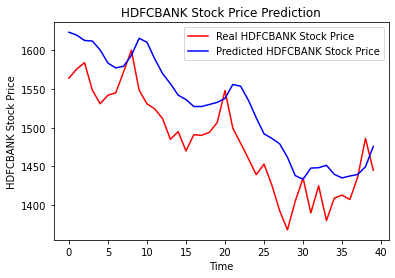

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real HDFCBANK Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted HDFCBANK Stock Price')
plt.title('HDFCBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFCBANK Stock Price')
plt.legend()
plt.show()
